In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import ranksums
from sklearn.feature_selection import mutual_info_regression
import matplotlib.patches as mpatches
import os
from scipy.stats import ranksums
from matplotlib import font_manager
from scipy.optimize import curve_fit
from scipy.stats import ttest_1samp

In [11]:
if not os.path.exists('lstmPlots'):
    os.mkdir('lstmPlots')

In [12]:
font_dirs = ['/storage/home/hcoda1/8/zmobille3/scratch/arial']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# font_manager.get_font_names()

plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=22
plt.rcParams['axes.titlesize']=22
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

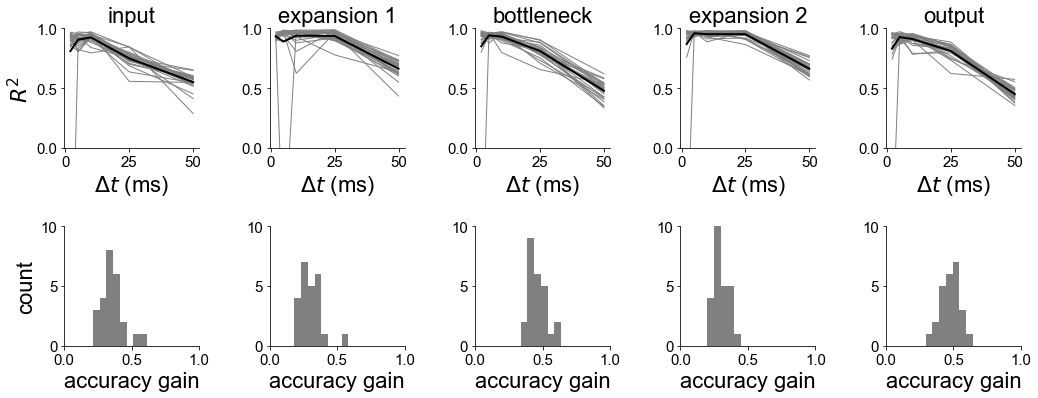

In [14]:
delta_t_list = [2,5,10,25,50]; numDeltas = len(delta_t_list)
numseeds = 25

fig, ax = plt.subplots(2,5,figsize=(15,6))
layers = ['in','E1','B','E2','out']; numLayers=len(layers)
layerNames = ['input','expansion 1','bottleneck','expansion 2','output']
allgains = np.zeros((numseeds,numLayers))
for li in range(numLayers):
    layerName = layerNames[li]
    layer = layers[li]
    r2s = np.zeros((numseeds,numDeltas))
    gains=[]
    for seed in range(numseeds):
        stuff_v_dt=[]
        for dti in range(numDeltas):
            deltat = delta_t_list[dti]
            path = f'LSTMbayesdecodeData/seed{seed}/deltat{deltat}'
            ytest_path = path + f'/ytest_{layer}.npy'
            ytest = np.load(ytest_path)
            ypred_path = path + f'/ypred_{layer}.npy'
            ypred = np.load(ypred_path)
            r2 = r2_score(ytest,ypred)
            r2s[seed,dti] = r2
            stuff_v_dt.append(r2)
#         m,b = np.polyfit(delta_t_list,stuff_v_dt,1)
        gain = stuff_v_dt[1] - stuff_v_dt[-1]
#         gain = max(stuff_v_dt) - stuff_v_dt[-1]
        gains.append(gain)
        allgains[seed,li] = gain
        ax[0,li].plot(delta_t_list,stuff_v_dt,linewidth=1,color='gray')
    stat,pval = ttest_1samp(gains,popmean=0)
#     print(pval)
    binsize=0.05
    histstuff = ax[1,li].hist(gains,bins=np.arange(min(gains),max(gains)+binsize,binsize),color='gray')
#     histstuff = ax[1,li].hist(gains,bins=5,color='gray')
    ax[1,li].set_ylim(0,10)
    ax[1,li].set_xlim(0.,1.)
#     ax[1,li].set_xticks([-0.025,0,0.025])
    r2mean = r2s.mean(axis=0)
    r2sd = r2s.std(axis=0)
    ax[0,li].set_title(layerName)
    ax[0,li].set_xticks([0,25,50])
#     ax[0,li].errorbar(delta_t_list,mimean,misd)
#     ax[1,li].set_yticks([0,5,10])
    ax[0,li].set_xlabel('$\Delta t$ (ms)')
    ax[0,li].plot(delta_t_list,r2mean,color='black',linewidth=2)
    ax[0,li].set_ylim(0,1)
    ax[1,li].set_xlabel('accuracy gain')
#     ax[1,li].vlines(0,0,10,linestyle='--',color='gold',linewidth=3)
ax[0,0].set_ylabel('$R^2$')
ax[1,0].set_ylabel('count')
plt.tight_layout()
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2gains.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2gains.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

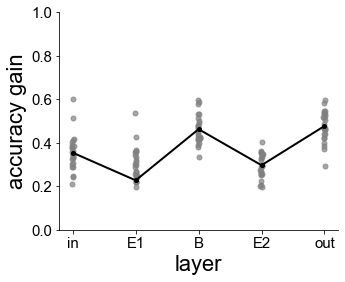

In [15]:
# meangain = allgains.mean(axis=0)
medgain = np.mean(allgains,axis=0)
numseeds = allgains.shape[0]
# sdgain = allgains.std(axis=0)
layeraxis = [0,1,2,3,4]

fig, ax = plt.subplots(figsize=(5,4))
for i in range(5):
    ydata = allgains[:,i]
    xdata = i*np.ones(numseeds) + np.random.normal(0,0.01,numseeds)
    plt.plot(xdata,ydata,marker='o',linestyle='',color='gray',markersize=5,alpha=0.7)
plt.plot(layeraxis,medgain,color='black',linewidth=2,marker='o',markersize=4)
plt.xticks(layeraxis,layers)
plt.xlabel('layer')
plt.ylim(0,1)
plt.ylabel('accuracy gain')
# ax.errorbar(layeraxis,meangain,sdgain)
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2gainsVlayer.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2gainsVlayer.svg',bbox_inches='tight',dpi=200)
plt.show()

3.768810139693733e-18
5.496990565744428e-05
1.80304637186587e-21
5.527170319372188e-19
3.198270871043587e-22


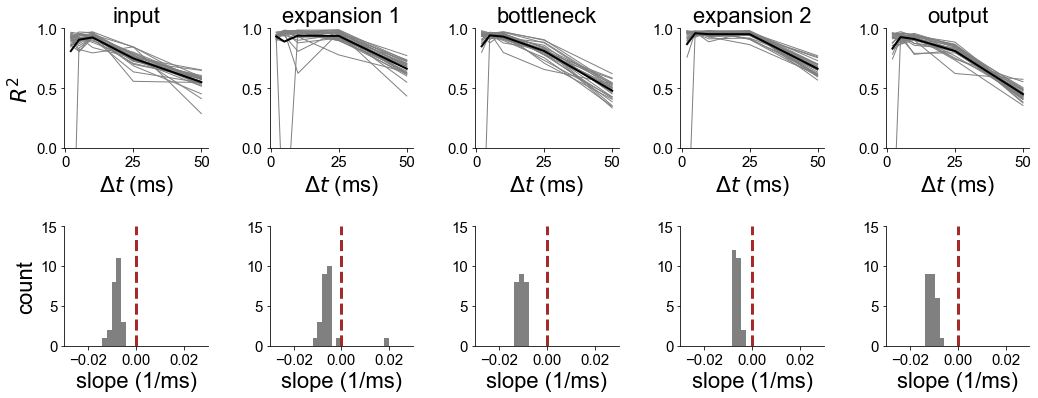

In [14]:
delta_t_list = [2,5,10,25,50]; numDeltas = len(delta_t_list)
numseeds = 25

fig, ax = plt.subplots(2,5,figsize=(15,6))
layers = ['in','E1','B','E2','out']; numLayers=len(layers)
layerNames = ['input','expansion 1','bottleneck','expansion 2','output']
allslopes = np.zeros((numseeds,numLayers))
for li in range(numLayers):
    layerName = layerNames[li]
    layer = layers[li]
    r2s = np.zeros((numseeds,numDeltas))
    slopes=[]
    for seed in range(numseeds):
#         print(f'seed {seed}')
        stuff_v_dt=[]
        for dti in range(numDeltas):
            deltat = delta_t_list[dti]
            path = f'LSTMbayesdecodeData/seed{seed}/deltat{deltat}'
            ytest_path = path + f'/ytest_{layer}.npy'
            ytest = np.load(ytest_path)
            ypred_path = path + f'/ypred_{layer}.npy'
            ypred = np.load(ypred_path)
            r2 = r2_score(ytest,ypred)
            r2s[seed,dti] = r2
            stuff_v_dt.append(r2)
        m,b = np.polyfit(delta_t_list[1:],stuff_v_dt[1:],1)
#         gain = stuff_v_dt[1] - stuff_v_dt[-1]
#         gain = max(stuff_v_dt) - stuff_v_dt[-1]
        slopes.append(m)
        allslopes[seed,li] = m
        ax[0,li].plot(delta_t_list,stuff_v_dt,linewidth=1,color='gray')
    stat,pval = ttest_1samp(slopes,popmean=0)
    print(pval)
    binsize=0.002
    histstuff = ax[1,li].hist(slopes,bins=np.arange(min(slopes),max(slopes)+binsize,binsize),color='gray')
#     histstuff = ax[1,li].hist(slopes,bins=5,color='gray')
    ax[1,li].set_ylim(0,15)
#     ax[1,li].set_xlim(-0.025,0.025)
    ax[1,li].set_xlim(-0.03,0.03)
#     ax[1,li].set_xticks([-0.025,0,0.025])
    r2mean = r2s.mean(axis=0)
    r2sd = r2s.std(axis=0)
    ax[0,li].set_title(layerName)
    ax[0,li].set_xticks([0,25,50])
#     ax[0,li].errorbar(delta_t_list,mimean,misd)
#     ax[1,li].set_yticks([0,5,10])
    ax[0,li].set_xlabel('$\Delta t$ (ms)')
    ax[0,li].plot(delta_t_list,r2mean,color='black',linewidth=2)
    ax[0,li].set_ylim(0,1)
    ax[1,li].set_xlabel('slope (1/ms)')
    ax[1,li].vlines(0,0,15,color='brown',linewidth=3,linestyle='--')
#     ax[1,li].vlines(0,0,10,linestyle='--',color='gold',linewidth=3)
ax[0,0].set_ylabel('$R^2$')
ax[1,0].set_ylabel('count')
plt.tight_layout()
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2slopes.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2slopes.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

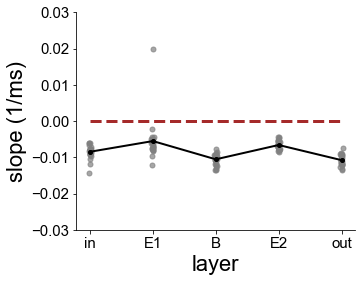

In [16]:
medslope = np.mean(allslopes,axis=0)
layeraxis = [0,1,2,3,4]
numseeds = allslopes.shape[0]

fig, ax = plt.subplots(figsize=(5,4))
for i in range(5):
    ydata = allslopes[:,i]
    xdata = i*np.ones(numseeds) + np.random.normal(0,0.01,numseeds)
    plt.plot(xdata,ydata,marker='o',linestyle='',color='gray',markersize=5,alpha=0.7)
plt.plot(layeraxis,medslope,color='black',linewidth=2,marker='o',markersize=4)
plt.xticks(layeraxis,layers)
plt.ylim(-0.03,0.03)
plt.hlines(0,0,4,linestyle='--',color='brown',linewidth=3)
plt.xlabel('layer')
plt.ylabel('slope (1/ms)')
# ax.errorbar(layeraxis,meangain,sdgain)
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2slopesVlayer.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_R2slopesVlayer.svg',bbox_inches='tight',dpi=200)
plt.show()

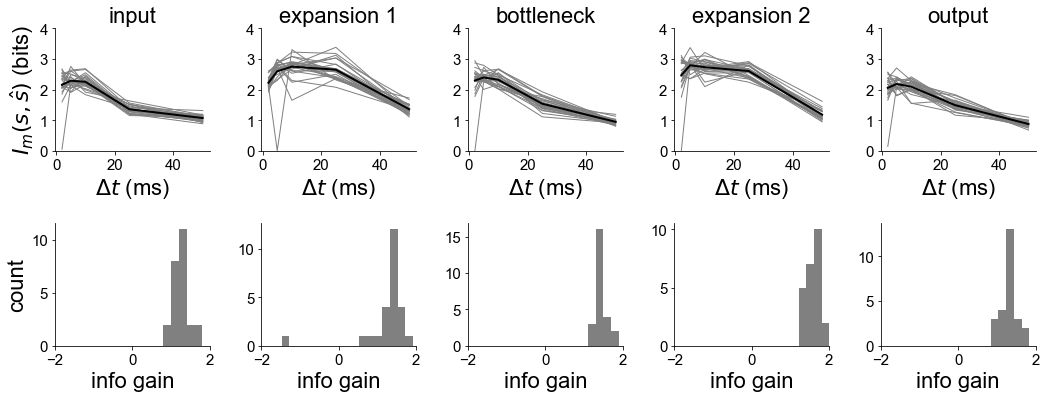

In [25]:
delta_t_list = [2,5,10,25,50]; numDeltas = len(delta_t_list)
numseeds = 25

fig, ax = plt.subplots(2,5,figsize=(15,6))
layers = ['in','E1','B','E2','out']; numLayers=len(layers)
layerNames = ['input','expansion 1','bottleneck','expansion 2','output']
allgains = np.zeros((numseeds,numLayers))
for li in range(numLayers):
    layerName = layerNames[li]
    layer = layers[li]
    mis = np.zeros((numseeds,numDeltas))
    gains=[]
    for seed in range(numseeds):
        stuff_v_dt=[]
        for dti in range(numDeltas):
            deltat = delta_t_list[dti]
            path = f'LSTMbayesdecodeData/seed{seed}/deltat{deltat}'
            ytest_path = path + f'/ytest_{layer}.npy'
            ytest = np.load(ytest_path)
            ypred_path = path + f'/ypred_{layer}.npy'
            ypred = np.load(ypred_path)
            X = ytest
            y = ypred.flatten()
#             print(f'ytest.shape={ytest.shape}')
            mi = mutual_info_regression(X,y)[0]/np.log(2)
            mis[seed,dti] = mi*(mi>0)
#             r2s[seed,dti] = r2
            stuff_v_dt.append(mi)
        gain = stuff_v_dt[1] - stuff_v_dt[-1]
        gains.append(gain)
        allgains[seed,li] = gain
        ax[0,li].plot(delta_t_list,stuff_v_dt,linewidth=1,color='gray')
    stat,pval = ttest_1samp(gains,popmean=0)
#     print(pval)
    binsize=0.2
    histstuff = ax[1,li].hist(gains,bins=np.arange(min(gains),max(gains)+binsize,binsize),color='gray')
#     histstuff = ax[1,li].hist(gains,bins=5,color='gray')
#     ax[1,li].set_ylim(0,15)
    ax[1,li].set_xlim(-2,2)
    mimean = mis.mean(axis=0)
    misd = mis.std(axis=0)
    ax[0,li].set_title(layerName)
#     ax[0,li].set_xticks([0,25,50])
    ax[0,li].set_xlabel('$\Delta t$ (ms)')
    ax[0,li].plot(delta_t_list,mimean,color='black',linewidth=2)
    ax[0,li].set_ylim(0,4)
    ax[1,li].set_xlabel('info gain')
#     ax[1,li].vlines(0,0,10,linestyle='--',color='gold',linewidth=3)
ax[0,0].set_ylabel('$I_m(s,\hat{s})$ (bits)')
ax[1,0].set_ylabel('count')
plt.tight_layout()
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_MIgains.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_MIgains.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

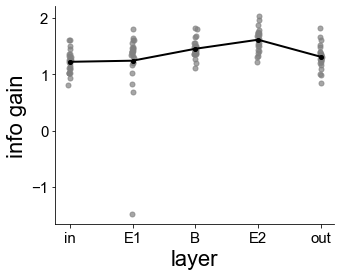

In [26]:
medgain = np.mean(allgains,axis=0)
layeraxis = [0,1,2,3,4]
numseeds = allgains.shape[0]

fig, ax = plt.subplots(figsize=(5,4))
for i in range(5):
    ydata = allgains[:,i]
    xdata = i*np.ones(numseeds) + np.random.normal(0,0.01,numseeds)
    plt.plot(xdata,ydata,marker='o',linestyle='',color='gray',markersize=5,alpha=0.7)
plt.plot(layeraxis,medgain,color='black',linewidth=2,marker='o',markersize=4)
plt.xticks(layeraxis,layers)
plt.xlabel('layer')
plt.ylabel('info gain')
# ax.errorbar(layeraxis,meangain,sdgain)
sns.despine()
plt.savefig('lstmPlots/5layerShot_MIgainsVlayer.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layerShot_MIgainsVlayer.svg',bbox_inches='tight',dpi=200)
plt.show()

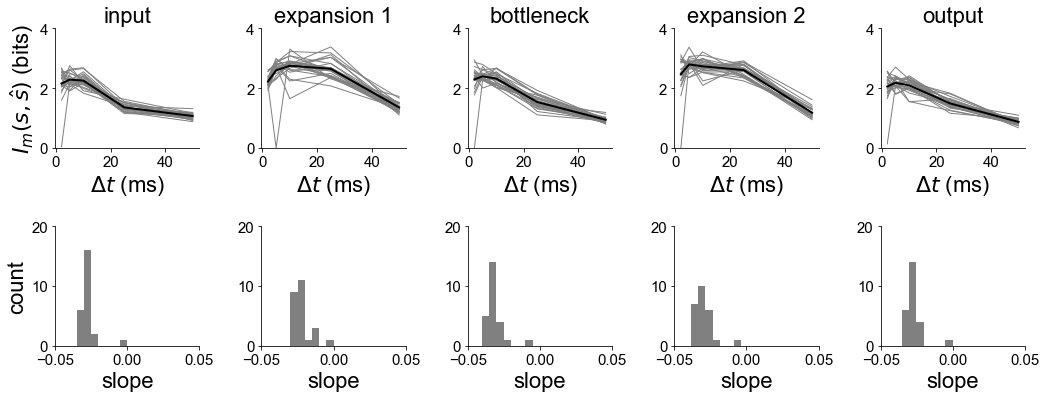

In [35]:
delta_t_list = [2,5,10,25,50]; numDeltas = len(delta_t_list)
numseeds = 25

fig, ax = plt.subplots(2,5,figsize=(15,6))
layers = ['in','E1','B','E2','out']; numLayers=len(layers)
layerNames = ['input','expansion 1','bottleneck','expansion 2','output']
allslopes = np.zeros((numseeds,numLayers))
for li in range(numLayers):
    layerName = layerNames[li]
    layer = layers[li]
    mis = np.zeros((numseeds,numDeltas))
    slopes=[]
    for seed in range(numseeds):
        stuff_v_dt=[]
        for dti in range(numDeltas):
            deltat = delta_t_list[dti]
            path = f'LSTMbayesdecodeData/seed{seed}/deltat{deltat}'
            ytest_path = path + f'/ytest_{layer}.npy'
            ytest = np.load(ytest_path)
            ypred_path = path + f'/ypred_{layer}.npy'
            ypred = np.load(ypred_path)
            X = ytest
            y = ypred.flatten()
            mi = mutual_info_regression(X,y)[0]/np.log(2)
            mis[seed,dti] = mi*(mi>0)
            stuff_v_dt.append(mi)
        m,b = np.polyfit(delta_t_list,stuff_v_dt,1)
        slopes.append(m)
        allslopes[seed,li] = m
        ax[0,li].plot(delta_t_list,stuff_v_dt,linewidth=1,color='gray')
    stat,pval = ttest_1samp(gains,popmean=0)
#     print(pval)
    binsize=0.005
    histstuff = ax[1,li].hist(slopes,bins=np.arange(min(slopes),max(slopes)+binsize,binsize),color='gray')
#     histstuff = ax[1,li].hist(slopes,bins=5,color='gray')
    ax[1,li].set_ylim(0,20)
    ax[1,li].set_xlim(-0.05,0.05)
    mimean = mis.mean(axis=0)
    misd = mis.std(axis=0)
    ax[0,li].set_title(layerName)
    ax[0,li].set_xlabel('$\Delta t$ (ms)')
    ax[0,li].plot(delta_t_list,mimean,color='black',linewidth=2)
    ax[0,li].set_ylim(0,4)
#     ax[0,li].set_ylim(0,1)
    ax[1,li].set_xlabel('slope')

ax[0,0].set_ylabel('$I_m(s,\hat{s})$ (bits)')
ax[1,0].set_ylabel('count')
plt.tight_layout()
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_MIslopes.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_MIslopes.svg',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

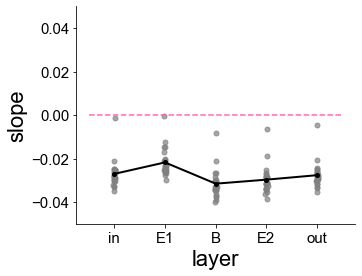

In [37]:
medgain = np.mean(allslopes,axis=0)
layeraxis = [0,1,2,3,4]
numseeds = allslopes.shape[0]

fig, ax = plt.subplots(figsize=(5,4))
for i in range(5):
    ydata = allslopes[:,i]
    xdata = i*np.ones(numseeds) + np.random.normal(0,0.01,numseeds)
    plt.plot(xdata,ydata,marker='o',linestyle='',color='gray',markersize=5,alpha=0.7)
plt.plot(layeraxis,medgain,color='black',linewidth=2,marker='o',markersize=4)
plt.hlines(0,-0.5,4.5,linestyle='--',color='hotpink')
plt.xticks(layeraxis,layers)
plt.ylim(-0.05,0.05)
plt.xlabel('layer')
plt.ylabel('slope')
# ax.errorbar(layeraxis,meangain,sdgain)
sns.despine()
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_MIslopesVlayer.png',bbox_inches='tight',dpi=200)
plt.savefig('lstmPlots/5layer4Hz20HzNoisy_MIslopesVlayer.svg',bbox_inches='tight',dpi=200)
plt.show()